# Loading and preprocessing Images

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from PIL import Image # for image preprocessing
import tensorflow as tf 
from tensorflow.keras.models import Sequential # for creating our model
from tensorflow.keras.layers import Dense, MaxPooling2D, Activation, Dropout, Flatten, Conv2D # model layers
from keras.callbacks import ModelCheckpoint, EarlyStopping # callbacks to early stop and save best model

In [ ]:
# directories
test_dir = "/content/drive/MyDrive/DS tools project/chest_xray/test"
train_dir = "/content/drive/MyDrive/DS tools project/chest_xray/train"
val_dir = "/content/drive/MyDrive/DS tools project/chest_xray/val"
paths = [test_dir, train_dir, val_dir]
# categories
categories = ['NORMAL', 'PNEUMONIA']

NORMAL


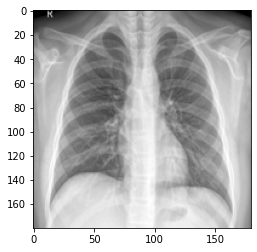

PNEUMONIA


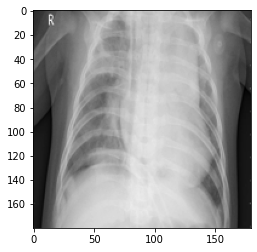

NORMAL


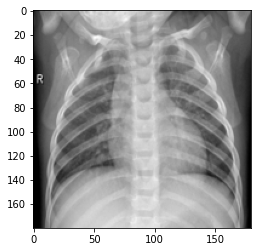

PNEUMONIA


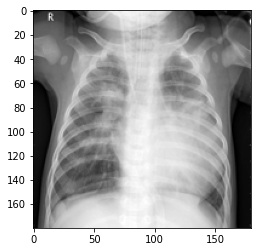

NORMAL


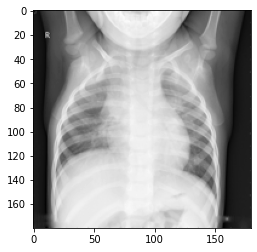

PNEUMONIA


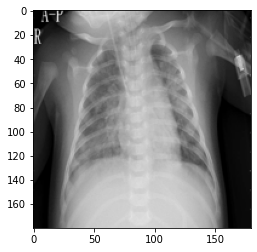

In [ ]:
# showing images
for pa in paths: 
  for cat in categories:
    path = os.path.join(pa,cat)
    for img in os.listdir(path):
      try:
        img_size = 180
        img_arr =Image.open(os.path.join(path,img)) 
        img_arr = img_arr.resize((img_size,img_size))
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        print(cat)
        plt.show()
      except Exception as e:
        e = e
      break
            

In [ ]:
# function to preprocess images into a list
def image_to_list(categories,dir):
    img_size = 180
    image_list=[]
    for cat in categories:
        path = os.path.join(dir,cat)
        label = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_arr =Image.open(os.path.join(path,img)) 
                new_img = img_arr.resize((img_size,img_size))
                new_img = np.asarray(new_img)
                arr = new_img.reshape((img_size, img_size, 1))
                image_list.append([arr,label])
            except Exception as e:
                e = e
    return image_list

In [ ]:
# transforming images to lists
val_list = image_to_list(categories,val_dir)
train_list = image_to_list(categories, train_dir)
test_list = image_to_list(categories, test_dir)

In [ ]:
# split, normalize and turns list to numpy array
def preprocess_data(data_list):
    img_size = 180
    X=[]
    y=[]
    for attribute,label in data_list:
        X.append(attribute)
        y.append(label)
    X = np.asarray(X).reshape(-1, img_size, img_size, 1) # reshape to image size
    X = np.array(X)/255.0 # normalizing data
    y = np.asarray(y)
    return X, y


In [ ]:
# final data preprocessing
X_train, y_train = preprocess_data(train_list)
X_test, y_test = preprocess_data(test_list)
X_val, y_val = preprocess_data(val_list)

# Model Building

In [ ]:
# early stopping
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', patience=8)

In [ ]:
model = Sequential()

# first layer
model.add(Conv2D(16, 3, input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# second layer
model.add(Conv2D(32, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# third layer
model.add(Conv2D(64, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# fourth layer
model.add(Conv2D(128, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# fifth layer
model.add(Conv2D(256, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# sixth layer (Dropout layer)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.1))

# output layer 
model.add(Dense(1))
model.add(Activation("sigmoid"))


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 178, 178, 16)      160       
_________________________________________________________________
activation_220 (Activation)  (None, 178, 178, 16)      0         
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 87, 87, 32)        4640      
_________________________________________________________________
activation_221 (Activation)  (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 41, 41, 64)      

In [ ]:
 history = model.fit(X_train, y_train,epochs = 20, batch_size = 32, validation_data = (X_val,y_val),callbacks=[checkpoint, early_stop])

Epoch 1/20
155/155 [==============================] - 142s 914ms/step - loss: 0.4782 - accuracy: 0.7863 - val_loss: 1.3177 - val_accuracy: 0.5625
Epoch 2/20
155/155 [==============================] - 142s 918ms/step - loss: 0.1944 - accuracy: 0.9222 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 3/20
155/155 [==============================] - 142s 917ms/step - loss: 0.1069 - accuracy: 0.9593 - val_loss: 0.2033 - val_accuracy: 0.8750
Epoch 4/20
155/155 [==============================] - 142s 918ms/step - loss: 0.0859 - accuracy: 0.9694 - val_loss: 0.0966 - val_accuracy: 1.0000
Epoch 5/20
155/155 [==============================] - 142s 919ms/step - loss: 0.0612 - accuracy: 0.9785 - val_loss: 0.5711 - val_accuracy: 0.7500
Epoch 6/20
155/155 [==============================] - 143s 923ms/step - loss: 0.0533 - accuracy: 0.9826 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 7/20
155/155 [==============================] - 144s 931ms/step - loss: 0.0470 - accuracy: 0.9828 - val_loss: 0.4308 -

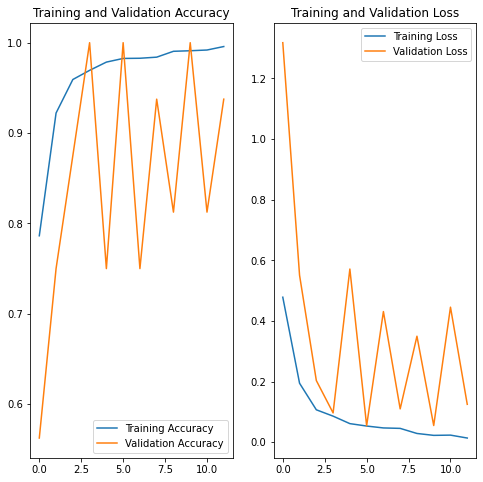

In [ ]:
# function to plot train and validation loss and accuracy
def plot(history):

    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs_range=range(len(training_accuracy))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, training_loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot(history)

In [ ]:
model.evaluate(X_test,y_test) 

20/20 [==============================] - 5s 263ms/step - loss: 0.9987 - accuracy: 0.8109


[0.998669445514679, 0.8108974099159241]

## Model Accuuracy 81%